# Task A Data Understanding

1.What is the objective of the data collection process?

The data is about different physical activites of human which were collected using the smartphone.The objective of the data collection proces is to use the data to recognize the different physical human activities like walking, sitting etc. by machines.
2.What Human activity types does this dataset have? How many subjectspeople have performed these activites?

The data has six huan activity which are Stand, sit,walk, walk upstairs, walk upstairs and lay down.
These activies are perfromed by a group of 30 volunteers with ages ranging from 19 to 48 years.

3.How many instances are available in the training and test sets? How many features are used ot represent each instance? Summarize the type of features extracyed in 2-3 sentences.

7352 instances are avvailable in the training set and in the testing set 2947 instances are available. 
561 features are used to represent each instance in training and testing set.
All the features are representation of the accelorometer and gyroscope 3 axial raw signals and they were filtered for noise. The accelorometer signals are divided into two types body and gravitational and then is it taken by which meter. Also magnitude is also provided. Finally, the axial data of gyroscope is given. All the data are between -1 to 1. 

4.Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy?

The support vector machine(SVM) binary classifier model has been used in the paper using a gausian kernal and one vs all approach. The model is trained using a 10-fold cross validation procedure by the training set which is a random split of the 70% of the total data. And, 30% of the left data is used for testing the model and an overall 96% of accuracy on the test data has been achieved.


# Task B K nearest neighbor classification

In [0]:
import warnings
warnings.filterwarnings(('ignore'))

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Training and Testing Data
Train_X= pd.read_csv('X_train.txt',delim_whitespace= True,header=None).values
Test_X= pd.read_csv('X_test.txt',delim_whitespace= True,header=None).values

#Label for Training and Testing Data
Labels = pd.read_csv('activity_labels.txt',delimiter=' ',header=None)
Train_y= pd.read_csv('Y_train.txt',delim_whitespace= True,header=None).values
Test_y= pd.read_csv('Y_test.txt',delim_whitespace= True,header=None).values

#Features
Features=pd.read_csv('features.txt',delimiter=' ',header=None)
Feature_c = np.reshape(Features[1].values,(1,561))
print ("Feature for Training and Testing are {}".format(Feature_c.shape))


#Shape of Training and Testing Dataset
print("Shape of Train_X {}".format(Train_X.shape))
print("Shape of Test_X {}".format (Test_X.shape))

#Number of Features in Training and Testing Dataset
print ("Shape of Train y {}".format(Train_y.shape))
print ("Shape of text y {}".format (Test_y.shape))


Feature for Training and Testing are (1, 561)
Shape of Train_X (7352, 561)
Shape of Test_X (2947, 561)
Shape of Train y (7352, 1)
Shape of text y (2947, 1)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
#Choosing the best K
k_r = list(range(1,50))


Acc_cv = []
F1_cv =[]

# perform 10-fold cross validation
for k in range(1,50):
    kNN_Model = KNeighborsClassifier(n_neighbors=k)
    Acc_score= cross_val_score(kNN_Model, Train_X, Train_y.ravel(), cv=10, scoring='accuracy', n_jobs=-1)
    f1_score = cross_val_score(kNN_Model, Train_X, Train_y.ravel(), cv=10, scoring='f1_weighted', n_jobs=-1)
    Acc_cv.append(Acc_score.mean())
    F1_cv.append(f1_score.mean())
    


In [0]:
Max_KNN = np.argmax(F1_cv)
Best_Value_K = k_r[Max_KNN]
    
print("Best value of K:\n{}".format(Best_Value_K))

Best value of K:
10


The best value of K has been selected using the F1-score. K=10 achieved the highest f1 score in 1 to 50 k value. Thus, it's selcted for the final KNN model.

Text(0,0.5,'Accuracy')

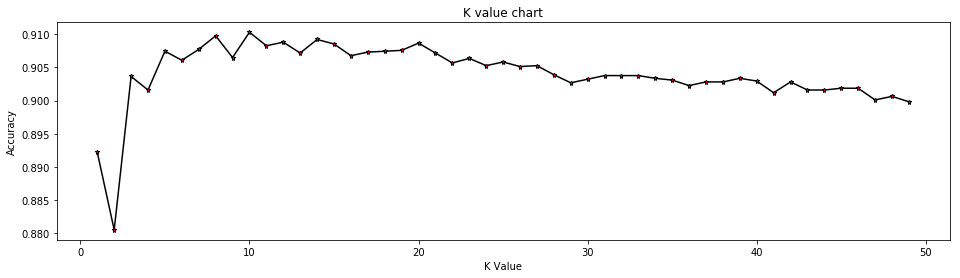

In [0]:
plt.figure(figsize=(16,4))
plt.plot(k_r,Acc_cv, color='black',linestyle='solid',marker='*',markerfacecolor='Red',markersize=5)
plt.title('K value chart')
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

The above model shows the cross validation accuracy with respect to K

In [0]:
#KNN final model

F_KNN = KNeighborsClassifier(n_neighbors=10)
F_KNN.fit(Train_X,Train_y.ravel())
Predict_KNN= F_KNN.predict(Test_X)
F_KNN_Acc= accuracy_score(Test_y,Predict_KNN)
F_KNN_Clas= classification_report(Test_y,Predict_KNN)
F_KNN_Con=confusion_matrix(Test_y,Predict_KNN)
print("Accuracy Score for KNN:\n{}".format(F_KNN_Acc))
print("Classification Report for KNN:\n{}".format(F_KNN_Clas))
print("Confusion Matrix for KNN:\n{}".format(F_KNN_Con))

Accuracy Score for KNN:
0.9066847641669494
Classification Report for KNN:
             precision    recall  f1-score   support

          1       0.85      0.98      0.91       496
          2       0.91      0.92      0.91       471
          3       0.96      0.78      0.86       420
          4       0.89      0.83      0.86       491
          5       0.86      0.91      0.88       532
          6       1.00      0.99      1.00       537

avg / total       0.91      0.91      0.91      2947

Confusion Matrix for KNN:
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]


The KNN model with 10 K shows an accuracy of 90% and f1-score of 91% overall. It classifies activity laying in all the time but, the other activity clasification f1-score is near to 90% or below 90%

# Task C Multiclass Logistic Regression with Elastic Net

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

from sklearn.linear_model import SGDClassifier 

F1_ENR=[]

L1_Value=[0,0.15,0.5,0.7,1]
Alpha_Value=[1e-4,3e-4,3e-3,1e-2,3e-2]

F1_ENR_Average=[]
ENR_L1=[]
ENR_Alpha=[]


for i in L1_Value:
    for l in Alpha_Value:
        ENR_Model = SGDClassifier(loss='log', penalty='elasticnet', alpha=l, l1_ratio=i)
        f1_ENR = cross_val_score(estimator=ENR_Model, X=Train_X, y=Train_y.ravel(),cv=10,scoring='f1_weighted',n_jobs=-1)
        F1_ENR_Average=f1_ENR.mean()
        F1_ENR.append(F1_ENR_Average)
        ENR_L1 = np.append(ENR_L1,i)
        ENR_Alpha= np.append(ENR_Alpha,l)
    

In [0]:
max_F1_Score=np.argmax(F1_ENR)

Best_lambda = ENR_L1[max_F1_Score]
best_alpha= ENR_Alpha[max_F1_Score]
print("Best Lambda: {}".format(Best_lambda))
print("Best alpha: {}".format(best_alpha))
Average_F1_Score= ((np.array(F1_ENR)).mean())
print("Average F1-score:{}".format(Average_F1_Score))

Best Lambda: 0.15
Best alpha: 0.0001
Average F1-score:0.9043214246017175


Using 10 folds cross validation based on f1 score the best lambda and best alpha value has been selected for making the final model

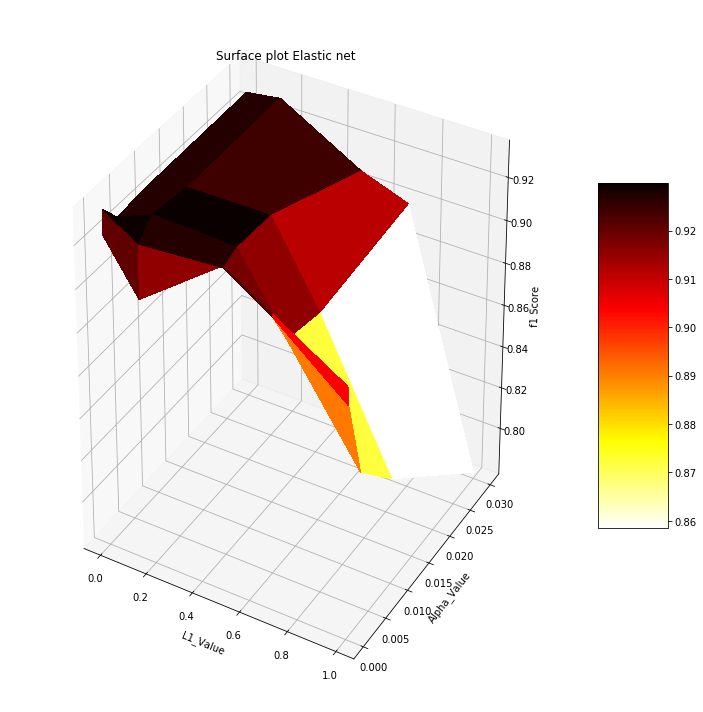

In [0]:
#Surface plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X=L1_Value
Y=Alpha_Value

X,Y=np.meshgrid(X,Y)
Z=np.array(F1_ENR)
Z=Z.reshape(5,5)

ax.set_xlabel('L1_Value')
ax.set_ylabel('Alpha_Value')
ax.set_zlabel('f1 Score')
fig.tight_layout()

plt.title('Surface plot Elastic net ')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.hot_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=5)
plt.show()


In [0]:
#Multiclass Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
ENR= SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)
ENR.fit(Train_X,Train_y.ravel())
predict_y = ENR.predict(Test_X)

ENR_acc= accuracy_score(Test_y,predict_y)
print("Accuracy Score for KNN:{}".format(ENR_acc))

print(confusion_matrix(Test_y,predict_y))
print(classification_report(Test_y,predict_y))

Accuracy Score for KNN:0.9524940617577197
[[490   1   5   0   0   0]
 [ 30 433   8   0   0   0]
 [  4  10 406   0   0   0]
 [  0   4   0 454  29   4]
 [  1   0   0  44 487   0]
 [  0   0   0   0   0 537]]
             precision    recall  f1-score   support

          1       0.93      0.99      0.96       496
          2       0.97      0.92      0.94       471
          3       0.97      0.97      0.97       420
          4       0.91      0.92      0.92       491
          5       0.94      0.92      0.93       532
          6       0.99      1.00      1.00       537

avg / total       0.95      0.95      0.95      2947



The above model shows an overall accuracy of 95% and f1-score is also 95%. It classifies the labels correctly 95% of the time. Most accurately it classifies laying and the least accurately is sitting, which has overall f1-score of 92% 

# Task D Support vector Machine( RBF Kernel)

In [0]:
from sklearn import svm
from sklearn import metrics

SVM_F1_Score=[]
gamma_Value=[1e-4,1e-3,]
C_Value=[1,10,100,1000]

SVM_gamma=[]
SVM_C=[]
SVM_F1_Average=[]
for l in gamma_Value:
    for i in C_Value:
        SVM= svm.SVC(kernel='rbf', gamma=l, C=i)
        SVM_f1_Score = cross_val_score(SVM, Train_X, Train_y.ravel(), cv=10, scoring='f1_weighted', n_jobs=-1)
        SVM_F1_Average=SVM_f1_Score.mean()
        SVM_F1_Score.append(SVM_F1_Average)
        SVM_C = np.append(SVM_C,i)
        SVM_gamma= np.append(SVM_gamma,l)  

In [0]:
Max_SVM_F1  = np.argmax(SVM_F1_Score)
Best_gamma = SVM_gamma[Max_SVM_F1]

Best_C= SVM_C[Max_SVM_F1]
print("Best gamma: {}".format(Best_gamma))
print("Best C:{}".format(Best_C))

Best gamma: 0.001
Best C:1000.0


Based on the maximum cross validation f1 score the best gamma and c value has been selected

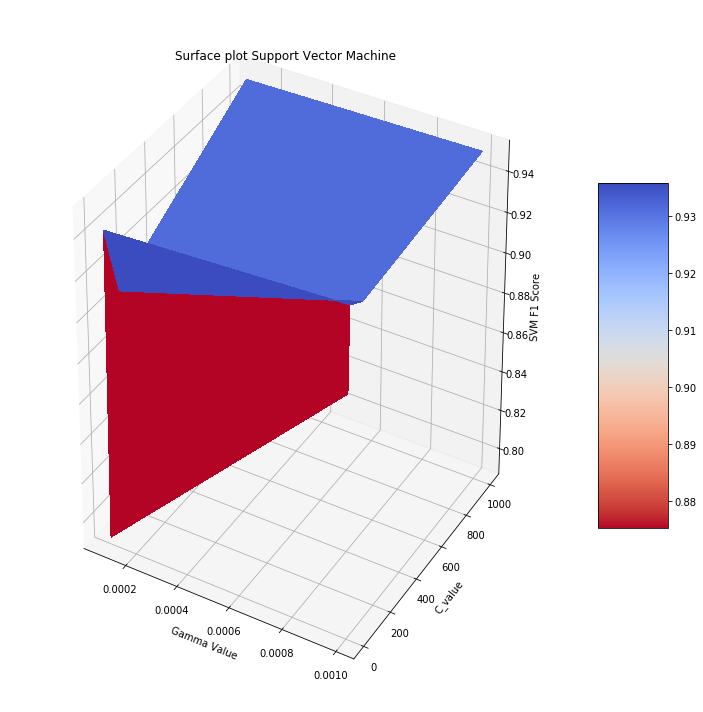

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X=gamma_Value
Y=C_Value

X,Y=np.meshgrid(X,Y)
Z=np.array(SVM_F1_Score)
Z=Z.reshape(4,2)

ax.set_xlabel('Gamma Value')
ax.set_ylabel('C_value')
ax.set_zlabel('SVM F1 Score')
fig.tight_layout()

plt.title('Surface plot Support Vector Machine ')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.coolwarm_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=5)
plt.show()


In [0]:
#Final SVM Model
from sklearn.metrics import classification_report, confusion_matrix
SVM_Final= svm.SVC(kernel='rbf', gamma=Best_gamma, C=Best_C)
SVM_Final.fit(Train_X,Train_y.ravel())
SVM_y = SVM_Final.predict(Test_X)

SVM_acc= accuracy_score(Test_y,SVM_y)
print("Accuracy Score for SVM:\n{}".format(SVM_acc))
SVM_confusion_matrix= confusion_matrix(Test_y,SVM_y)
print("Confusion matrix for SVM:\n{}".format(SVM_confusion_matrix))
SVM_classification_report=classification_report(Test_y,SVM_y)
print("Classification report for SVM:\n{}".format(SVM_classification_report))

Accuracy Score for SVM:
0.9657278588394977
Confusion matrix for SVM:
[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]
Classification report for SVM:
             precision    recall  f1-score   support

          1       0.96      0.99      0.98       496
          2       0.97      0.96      0.97       471
          3       0.99      0.97      0.98       420
          4       0.97      0.89      0.93       491
          5       0.91      0.98      0.94       532
          6       1.00      1.00      1.00       537

avg / total       0.97      0.97      0.97      2947



The support vector machine with RBF kernel shows an accuracy of 96% overall with the 97% F1-score overall. It shows a better result in comparison with the previous models.

# TASK E Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

#RF_Accuracy_Score=[]
RF_F1_Score=[]
RF_F1_Score_average=[]
True_Depth=[300,500,600]
No_Tree=[200,500,700]

RF_True_Depth=[]
RF_No_Tree=[]

for i in True_Depth:
    for l in No_Tree:
        RF= RandomForestClassifier(n_estimators=l, max_depth=i)
        RF_f1_Score = cross_val_score(RF, Train_X, Train_y.ravel(), cv=10, scoring='f1_weighted',n_jobs=-1)
        RF_F1_Score_average= RF_f1_Score.mean()
        RF_F1_Score.append(RF_F1_Score_average)
        RF_True_Depth=np.append(RF_True_Depth,i)
        RF_No_Tree=np.amppend(RF_No_Tree,l)

In [0]:
Max_F1_Score  = np.argmax(RF_F1_Score)
Best_True_Depth = RF_True_Depth[Max_F1_Score]

Best_No_Tree= RF_No_Tree[Max_F1_Score]
print("Best_True_Depth: {}".format(Best_True_Depth))
print("Best_No_Tree:{}".format(Best_No_Tree))

Best_True_Depth: 500.0
Best_No_Tree:700.0


10 fold cross validation has been used to find out the Best true depth and Best number of trees

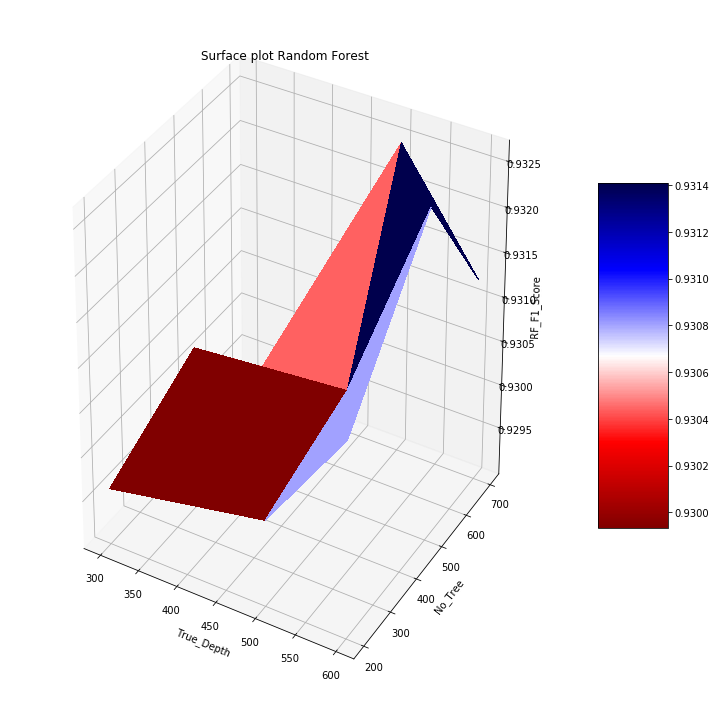

In [0]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X=True_Depth
Y=No_Tree

X,Y=np.meshgrid(X,Y)
Z=np.array(RF_F1_Score)
Z=Z.reshape(3,3)

ax.set_xlabel('True_Depth')
ax.set_ylabel('No_Tree')
ax.set_zlabel('RF_F1_Score')
fig.tight_layout()

plt.title('Surface plot Random Forest ')

surface_plot=ax.plot_surface(X,Y,Z, cmap=cm.seismic_r,linewidth=0,antialiased=False)
fig.colorbar(surface_plot, shrink=0.5, aspect=5)
plt.show()

In [0]:
#Final RF Model
from sklearn.metrics import classification_report, confusion_matrix
RF_Final= RandomForestClassifier(n_estimators=700, max_depth=500)
RF_Final.fit(Train_X,Train_y)
RF_y = RF_Final.predict(Test_X)

RF_acc= accuracy_score(Test_y,RF_y)
print("Accuracy Score for RF:\n{}".format(RF_acc))
RF_confusion_matrix= confusion_matrix(Test_y,RF_y)
print("Confusion matrix for RF:\n{}".format(RF_confusion_matrix))
RF_classification_report=classification_report(Test_y,RF_y)
print("Classification report for RF:\n{}".format(RF_classification_report))

Accuracy Score for RF:
0.9263657957244655
Confusion matrix for RF:
[[481   7   8   0   0   0]
 [ 33 432   6   0   0   0]
 [ 20  45 355   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  42 490   0]
 [  0   0   0   0   0 537]]
Classification report for RF:
             precision    recall  f1-score   support

          1       0.90      0.97      0.93       496
          2       0.89      0.92      0.90       471
          3       0.96      0.85      0.90       420
          4       0.91      0.89      0.90       491
          5       0.90      0.92      0.91       532
          6       1.00      1.00      1.00       537

avg / total       0.93      0.93      0.93      2947



The Random forest model shows an overall accuracy of 92% and f1 score of 93%. It performs poorly compared to the SVM model.

# Task F Discussion

From the above models, SVM model with the RFM kernal performs the best on the dataset by providing accuracy score of 96% and F1- Score of 97%.This dataset has a very high dimensions . As SVM is a very effecient model when it comes to outlier detection and avoiding the outliers for classification, from the dataset it avoids the outliers and uses most relevant data points to find the linear separtor. That's can be the reason for outperforming the other models.

KNN model has the lowest accuracy which is 90% and F-1 score 91%, compared to the above models. As, KNN is prone to outlers and KNN performs poorly when it comes to high dimension data. It's a good model when dimensions are lower and more data points are there. That's the reason of underperforming in comparison with the other model is beacause of the high dimensionality of the dataset.


In the research paper, SVM model with Gaussian Kernals have been used. That model achieved the accuracy of 96%. In this report also SVM model with different Kernal have been used. Still, the accuracy score is same. 

To improve the model performance, dataset can be weighs differently for training and testing. And, different kernals can be used too. More instances of gamma value and cost function can be used to find the better fit gamma value and cost function which may achieve better results. More related datapoints will also ad value in the model performance.

Finally, it can be said that the perfomance of different models is also on the type of dataset. So, prior research should be done on the dataset before using one specific model becasue every model has some plus points and demerits too.